In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/mhemmg/NeuralNetworkRSouzaCourse/master/Notebooks/extras/classes_MH/class_18/kc_house_data.csv")

In [3]:
data.sample(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5337,7697800170,20150428T000000,270000.0,3,1.75,1800,9314.0,2.0,0,0,...,8,1800,0,1979,0,98011,47.7762,-122.198,2100,9658
17935,8732130940,20140609T000000,213000.0,4,1.75,1980,9000.0,1.0,0,0,...,7,1480,500,1978,0,98023,47.3071,-122.381,1980,9360
13525,452001475,20140902T000000,477000.0,3,1.00,960,3600.0,1.0,0,0,...,7,960,0,1906,0,98117,47.6758,-122.369,1580,5000
4195,3626039403,20140922T000000,360000.0,3,1.50,1340,1110.0,2.0,0,0,...,7,1040,300,1999,0,98117,47.6980,-122.366,1220,1110
8466,7955000210,20140709T000000,306000.0,3,1.00,1450,7200.0,1.0,0,0,...,7,1010,440,1969,0,98034,47.7311,-122.199,1500,6767


In [4]:
# Único dato nulo
data[data["sqft_lot"].isnull()] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
109,3530510041,20140723T000000,188500.0,2,1.75,1240,NaN,1.0,0,0,...,8,1240,0,1985,0,98198,47.3813,-122.322,1270,4966


In [5]:
#
data= data.dropna()
#data.dtypes
data.shape
 
data["basement"]=(data['sqft_basement']>0).astype(int)
data["renovated"]=(data['yr_renovated']>2004).astype(int)


In [6]:
data.isnull().sum()
print(data.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
basement           int64
renovated          int64
dtype: object


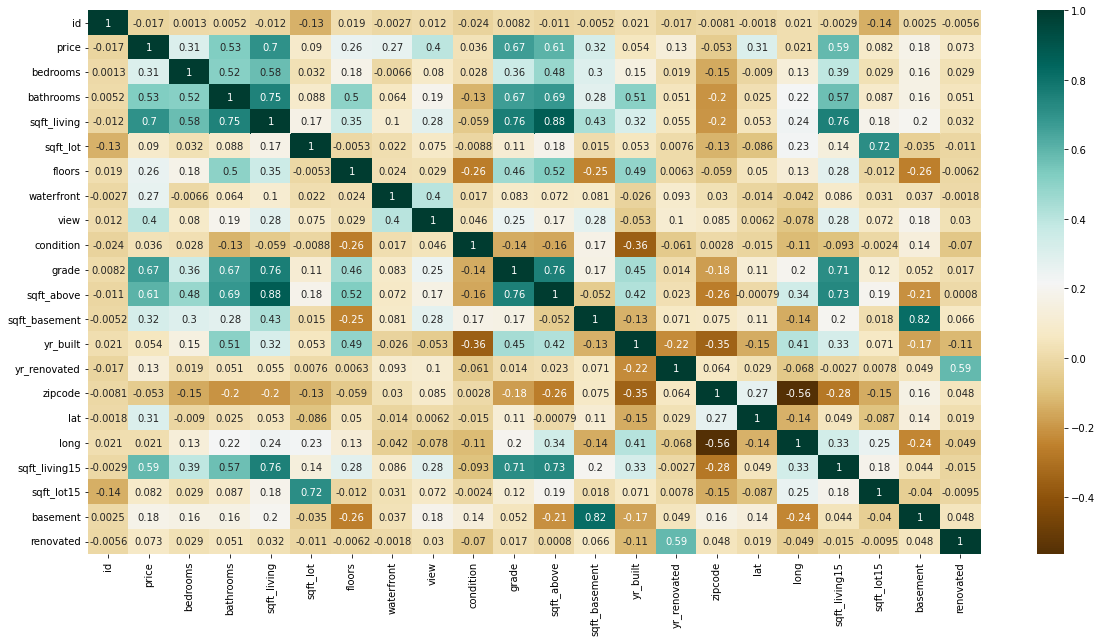

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
correlation_values= data.corr()
sns.heatmap(correlation_values,cmap='BrBG',annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


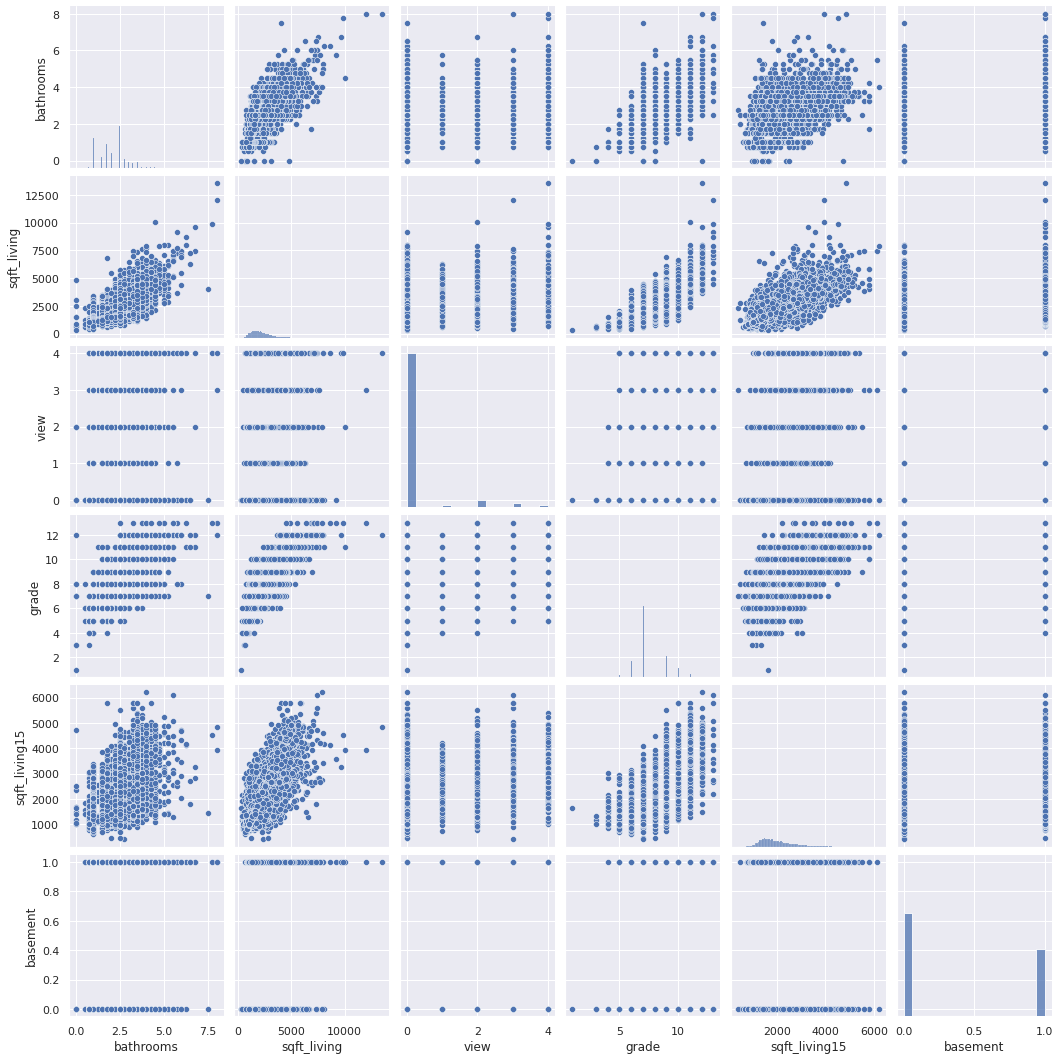

In [8]:
#Scatter plots of all columns
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
cols = ["bathrooms", "sqft_living","view", "grade","sqft_living15","basement"]
sns.pairplot(data[cols], size = 2.5)
plt.show()

In [9]:
data.describe()           

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
count,2.161400e+04,2.161400e+04,21614.000000,21614.000000,21614.000000,2.161400e+04,21614.000000,21614.000000,21614.000000,21614.000000,...,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000
mean,4.579993e+09,5.400835e+05,3.370871,2.114740,2079.913621,1.511002e+04,1.494286,0.007541,0.234293,3.409549,...,291.551078,1971.005321,84.398353,98077.930554,47.560047,-122.213868,1986.554502,12780.130378,0.392755,0.014805
std,2.876730e+09,3.671174e+05,0.930000,0.770149,918.405550,4.142026e+04,0.539987,0.086515,0.766301,0.650895,...,442.570309,29.372704,401.670358,53.498934,0.138563,0.140845,685.365764,27328.815288,0.488374,0.120775
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000,0.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069350e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10085.500000,1.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000


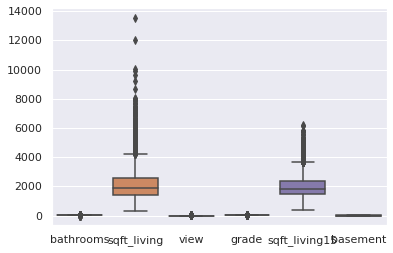

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

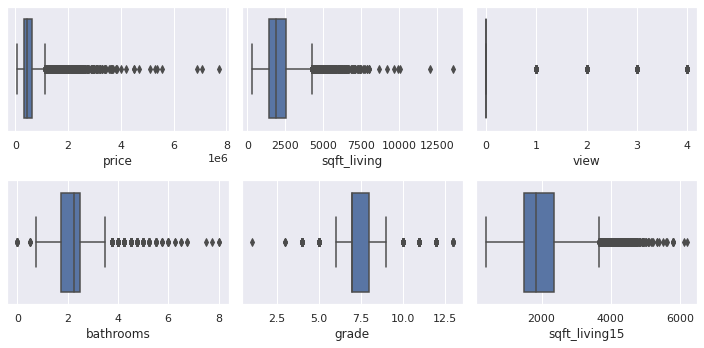

In [10]:
sns.set()
X= data[cols]
sns.boxplot(data= X)
#sns.stripplot(data=df[cols], color="orange")
plt.show()

def detectOutliers():
    fig, axs = plt.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(data['price'], ax = axs[0,0])
    plt2 = sns.boxplot(data['sqft_living'], ax = axs[0,1])
    plt3 = sns.boxplot(data['view'], ax = axs[0,2])
    plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
    plt2 = sns.boxplot(data['grade'], ax = axs[1,1])
    plt3 = sns.boxplot(data['sqft_living15'], ax = axs[1,2])
    plt.tight_layout()
detectOutliers()

In [11]:
#data["price"].plot.kde()


La métrica empeora cuando se eliminan los datos atípicos.Por eso no se eliminan, sin embargo solo es necesario quitar los comentarios y ejecutar el código para verificar. 

In [12]:
"""
# Eliminar datos atípicos 

Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
mask = (data.price < (Q1 - 1.5 * IQR)) | (data.price> (Q3 + 1.5 * IQR))
data[mask] = np.nan
data= data.dropna()
#data=data[mask]
"""

'\n# Eliminar datos atípicos \n\nQ1 = data.price.quantile(0.25)\nQ3 = data.price.quantile(0.75)\nIQR = Q3 - Q1\nmask = (data.price < (Q1 - 1.5 * IQR)) | (data.price> (Q3 + 1.5 * IQR))\ndata[mask] = np.nan\ndata= data.dropna()\n#data=data[mask]\n'

In [13]:
"""
Q11 = data.sqft_living.quantile(0.25)
Q33 = data.sqft_living.quantile(0.75)
IQRR = Q33 - Q11
mask1 = (data.sqft_living< (Q11 - 1.5 * IQRR)) | (data.sqft_living> (Q33 + 1.5 * IQRR))
#data[mask] = np.nan
#data= data.dropna()
data[mask1] = np.nan
data= data.dropna()
"""

'\nQ11 = data.sqft_living.quantile(0.25)\nQ33 = data.sqft_living.quantile(0.75)\nIQRR = Q33 - Q11\nmask1 = (data.sqft_living< (Q11 - 1.5 * IQRR)) | (data.sqft_living> (Q33 + 1.5 * IQRR))\n#data[mask] = np.nan\n#data= data.dropna()\ndata[mask1] = np.nan\ndata= data.dropna()\n'

In [14]:
"""
Q1 = data.sqft_living15.quantile(0.25)
Q3 = data.sqft_living15.quantile(0.75)
IQR = Q3 - Q1
mask2 = (data.sqft_living15< (Q1 - 1.5 * IQR)) | (data.sqft_living15> (Q3 + 1.5 * IQR))
data[mask2] = np.nan
data= data.dropna()
"""

'\nQ1 = data.sqft_living15.quantile(0.25)\nQ3 = data.sqft_living15.quantile(0.75)\nIQR = Q3 - Q1\nmask2 = (data.sqft_living15< (Q1 - 1.5 * IQR)) | (data.sqft_living15> (Q3 + 1.5 * IQR))\ndata[mask2] = np.nan\ndata= data.dropna()\n'

In [15]:
data.shape


(21614, 23)

In [16]:
# Definiendo el conjunto de valores dependientes para predecir el precio de la casa
#data_r= data[cols] 
#X=data_r.loc[:, data_r.columns.drop('price')]
cols1 = ["sqft_living"]

X= data[cols]
y= data[["price"]] #.values 



###Normalización

In [17]:

from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Normalize X
#X = X.values #returns a numpy array

#min_max_scaler = MinMaxScaler()
scaler = StandardScaler().fit(X)
#x_scaled = min_max_scaler.fit_transform(X)
x_scaled= scaler.transform(X)
X= pd.DataFrame(x_scaled)

In [18]:

#Normalize y
#y = y.values #returns a numpy array
scaler = StandardScaler().fit(y)
#min_max_scaler = MinMaxScaler()
#y_scaled = min_max_scaler.fit_transform(y)
y_scaled= scaler.transform(y)
y= pd.DataFrame(y_scaled)


Análisis de multicolinealidad con el fin de obtener mejor precisión en la predicción. Sin embargo, a pesar de tener features sin multicolinealidad, es decir con un vif menor a 5 no se genera una mejor predicción. 

In [19]:
#Multicolinealidad
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

def preprocessing(X):    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
#Función para evaluar la multicolinealidad

X_data=data.loc[:, data.columns.drop(["id","date","price"])]
preprocessing(X_data.drop(['sqft_living','bedrooms',"bathrooms","grade","sqft_above","sqft_basement","yr_built","lat","long","condition","zipcode","yr_renovated"], axis=1))

        VIF       Features
0  2.324912       sqft_lot
1  2.106694         floors
2  1.204844     waterfront
3  1.411200           view
4  3.459884  sqft_living15
5  2.513859     sqft_lot15
6  1.662075       basement
7  1.016451      renovated


In [21]:
X_d= X_data.drop(['sqft_living','bedrooms',"bathrooms","grade","sqft_above","sqft_basement","yr_built","lat","long","condition","zipcode","yr_renovated"],axis=1)

X_dd=X_d.drop(["floors","waterfront","view","basement","renovated"],axis=1)

scaler1 = StandardScaler().fit(X_dd)
x_scaled1= scaler1.transform(X_dd)
X_dd= pd.DataFrame(x_scaled1)
X_r= pd.concat( [X_dd , X_d.drop( ["sqft_lot","sqft_living15","sqft_lot15"],axis=1).reset_index().drop(["index"],axis=1 )],axis= 1  )

#X_d.drop(["sqft_lot","sqft_living15","sqft_lot15"],axis= 1).reset_index().drop(["index"],axis=1 )
#X_dd


In [22]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


In [23]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [28]:
def reg_model():
    tf.random.set_seed(1234)
    model = Sequential()
    model.add(Dense(5, input_dim=6, activation='relu'))
    model.add(Dense(10, activation='relu'))
    #model.add(Dense(10,activation='relu'))
    #model.add(Dense(20,activation='relu'))  
    model.add(Dense(1))

    # compile model
    #model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [29]:
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#estimator = KerasRegressor(build_fn=reg_model, epochs=20, batch_size=10, verbose=0)
#history= estimator.fit(x_train, y_train)
#y_pred = estimator.predict(x_test)

# show its root mean square error
#mse = mean_squared_error(y_test, y_pred)
#print("KERAS REG RMSE : %.2f" % (mse ** 0.5))


In [30]:
from sklearn.metrics import r2_score
#r2_score(y_test,y_pred) 

In [31]:
def evaluate(model, batch_size=64, epochs=5):
    model.summary()
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mae', 'mse'])
    
    
    hist= model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_split = 0.2, verbose=False)
    
    y_pred = model.predict(x_test)
    return y_pred,hist
model= reg_model()
y_pred,hist= evaluate(model, batch_size=250, epochs=40)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 35        
                                                                 
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [32]:
mse = mean_squared_error(y_test, y_pred)
print("RMSE : %.3f" % (mse ** 0.5))
R2= r2_score(y_test,y_pred) 
print("R2: %.4f" % (R2))

hist1 = pd.DataFrame(hist.history)
hist1['epoch'] = hist.epoch
hist1.tail()


RMSE : 0.589
R2: 0.6401


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
35,0.358663,0.394110,0.358663,0.361845,0.389448,0.361845,35
36,0.358658,0.393389,0.358658,0.358994,0.390293,0.358994,36
37,0.357528,0.393107,0.357528,0.359739,0.391776,0.359739,37
38,0.357854,0.393072,0.357854,0.359241,0.389765,0.359241,38
39,0.357165,0.393055,0.357165,0.360047,0.389777,0.360047,39


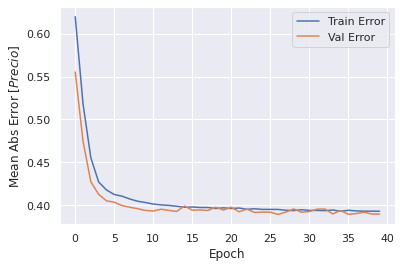

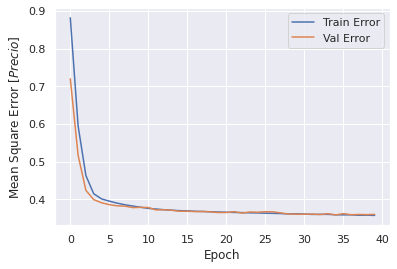

In [36]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [$Precio$]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Precio$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(hist)


Text(0, 0.5, 'Predictions [Precio]')

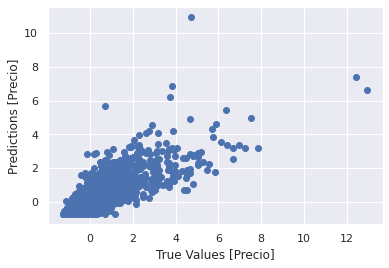

In [34]:

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Precio]')
plt.ylabel('Predictions [Precio]')


In [35]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

print('R2_train: ', LR.score( x_train, y_train))
print('R2_test: ', LR.score(x_test, y_test))

R2_train:  0.574096170518358
R2_test:  0.5858186110723307
